In [1]:
import pandas as pd
import scraper

                                              Titles
0  Reddit may force Apollo and third-party client...
1  Popular iOS Reddit client Apollo will shut dow...
2  r/Apple will be joining the blackout to protes...
3                           Goodbye Apollo 2017-2023
4  Reddit's CEO really wants you to know that he ...


In [2]:
# fetch_data(reddit, FILE)
headlines = scraper.load_data("data.txt")

# create a data frame
apple_df = pd.DataFrame(headlines)
apple_df.columns = ["Titles"]

# data cleaning and transformation
apple_df.Titles.duplicated().sum()
apple_df["Titles"]= apple_df["Titles"].apply(scraper.clean_text)
     
# cleaning the text
apple_df["Titles"]= apple_df["Titles"].apply(scraper.remove_emoji)

# show the clean text
print(apple_df.head())

                                              Titles
0  Reddit may force Apollo and third-party client...
1  Popular iOS Reddit client Apollo will shut dow...
2  r/Apple will be joining the blackout to protes...
3                           Goodbye Apollo 2017-2023
4  Reddit's CEO really wants you to know that he ...


In [3]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [4]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [5]:
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
apple_df["Subjectivity"] = apple_df["Titles"].apply(getSubjectivity)
apple_df["Polarity"] = apple_df["Titles"].apply(getPolarity)
#Now display data
apple_df.head()

,Titles,Subjectivity,Polarity
0,Reddit may force Apollo and third-party client...,0.288889,-0.155556
1,Popular iOS Reddit client Apollo will shut dow...,0.594444,0.222222
2,r/Apple will be joining the blackout to protes...,0.250000,0.000000
3,Goodbye Apollo 2017-2023,0.000000,0.000000
4,Reddit's CEO really wants you to know that he ...,0.100000,0.200000


In [6]:
def getInsight(score): 
    if score < 0: return "Negative"
    elif score == 0:  return "Neutral"
    else: return "Positive"
 
apple_df["Insight"] = apple_df["Polarity"].apply(getInsight)
apple_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Reddit may force Apollo and third-party client...,0.288889,-0.155556,Negative
1,Popular iOS Reddit client Apollo will shut dow...,0.594444,0.222222,Positive
2,r/Apple will be joining the blackout to protes...,0.250000,0.000000,Neutral
3,Goodbye Apollo 2017-2023,0.000000,0.000000,Neutral
4,Reddit's CEO really wants you to know that he ...,0.100000,0.200000,Positive
5,Reddit's CEO responds to a thread discussing h...,0.400000,-0.300000,Negative
6,Apollo Is a Work of Art,0.000000,0.000000,Neutral
7,"This is Apple Vision Pro, the mixed reality he...",0.250000,0.000000,Neutral
8,Reddit plagued with 1-star App Store reviews o...,0.000000,0.000000,Neutral
9,Apollo dev “I want to debunk Reddit’s claims”,0.000000,0.000000,Neutral


In [7]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

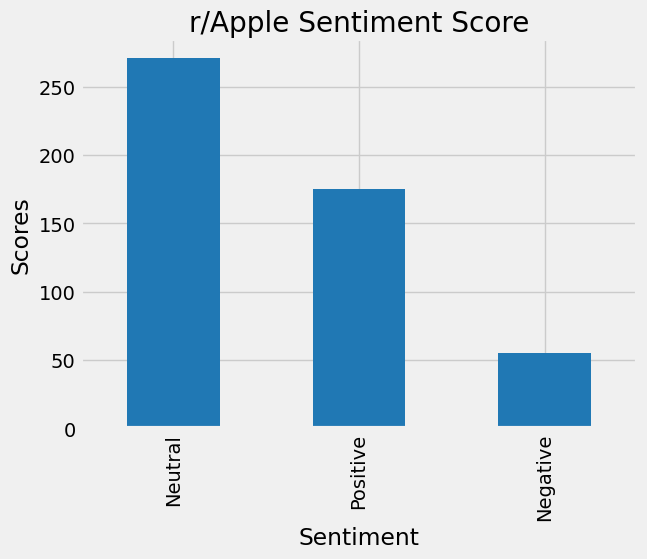

In [8]:
plt.title("r/Apple Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
apple_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [9]:
stopwords = STOPWORDS
print(stopwords)

{'you', 'any', 'further', 'a', "didn't", 'ourselves', 'why', "he's", "don't", 'no', 'also', 'was', "i'll", "she'll", "why's", 'could', 'how', 'down', 'into', 'theirs', 'would', "you'd", 'above', 'having', 'itself', 'off', 'we', "let's", 'as', "where's", 'between', 'themselves', 'are', 'an', "doesn't", 'hers', "shan't", 'she', 'at', 'below', 'up', "there's", 'nor', "that's", 'r', "they'd", 'for', 'too', 'did', 'there', 'my', 'who', 'out', "i'd", 'had', "weren't", 'again', 'on', 'in', "isn't", "i've", "how's", 'before', 'only', 'after', "she'd", 'just', 'your', 'from', "wouldn't", "what's", 'so', 'her', 'same', 'himself', "he'd", 'since', 'being', 'not', 'the', 'more', 'am', 'else', 'few', 'to', "shouldn't", 'shall', 'through', 'but', 'while', "here's", "i'm", 'most', 'once', 'ever', 'k', 'like', 'of', 'over', 'all', "they've", 'those', "hasn't", "it's", 'be', 'do', "who's", 'its', "he'll", "aren't", "mustn't", 'when', "can't", "we're", 'should', 'our', 'then', 'or', "we've", 'cannot', '

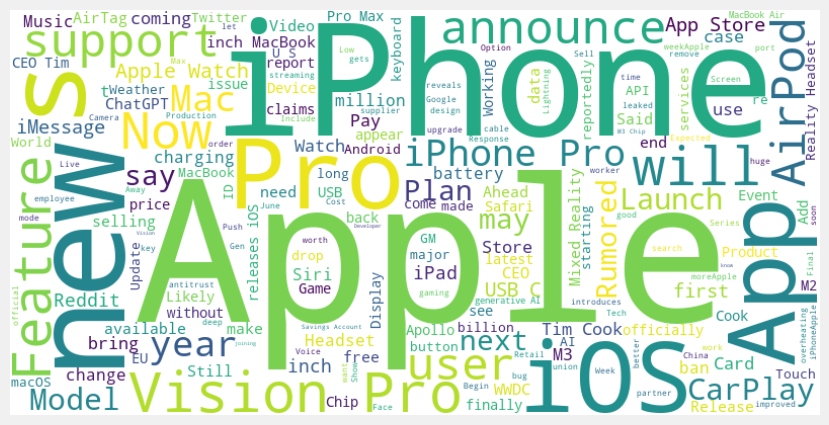

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your text data
text = "".join([twts for twts in apple_df["Titles"]])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()